In [32]:
import os
import pandas as pd
import time
from pathlib import Path
from audiolib import AudioDataset, AudioFile

In [3]:
# Load data filters
filter_path = Path('../data/interim/train')
data_filters = os.listdir(filter_path)
data_filters.remove('.DS_Store')
print('Filter file names:', data_filters)
print('\nExample filter file:')
pd.read_csv(filter_path/data_filters[0]).head()

Filter file names: ['vocal_acoustic-filter.csv', 'bass_acoustic-filter.csv', 'vocal_electronic-filter.csv', 'string_electronic-filter.csv', 'brass_electronic-filter.csv', 'guitar_acoustic-filter.csv', 'string_acoustic-filter.csv', 'flute_acoustic-filter.csv', 'reed_acoustic-filter.csv', 'brass_acoustic-filter.csv', 'keyboard_acoustic-filter.csv', 'bass_electronic-filter.csv', 'guitar_electronic-filter.csv']

Example filter file:


,instrument,keep
0,vocal_acoustic_009,1
1,vocal_acoustic_028,1
2,vocal_acoustic_023,1
3,vocal_acoustic_024,1
4,vocal_acoustic_016,1


In [4]:
# Store filters in dict
filtered_instr = {}
for filter_file in data_filters:
    df_filter = pd.read_csv(filter_path/filter_file)
    instr_name = filter_file.split('-')[0]
    filtered_instr[instr_name] = (
        list(df_filter.loc[df_filter['keep'] == 1, 'instrument'].values))
print('Keys:', filtered_instr.keys())
print('\nExample values for vocal acoustic:', filtered_instr['vocal_acoustic'])

Keys: dict_keys(['vocal_acoustic', 'bass_acoustic', 'vocal_electronic', 'string_electronic', 'brass_electronic', 'guitar_acoustic', 'string_acoustic', 'flute_acoustic', 'reed_acoustic', 'brass_acoustic', 'keyboard_acoustic', 'bass_electronic', 'guitar_electronic'])

Example values for vocal acoustic: ['vocal_acoustic_009', 'vocal_acoustic_028', 'vocal_acoustic_023', 'vocal_acoustic_024', 'vocal_acoustic_016', 'vocal_acoustic_025', 'vocal_acoustic_026', 'vocal_acoustic_003', 'vocal_acoustic_002', 'vocal_acoustic_013', 'vocal_acoustic_015', 'vocal_acoustic_011', 'vocal_acoustic_014', 'vocal_acoustic_018', 'vocal_acoustic_012', 'vocal_acoustic_027', 'vocal_acoustic_019', 'vocal_acoustic_021', 'vocal_acoustic_008', 'vocal_acoustic_005', 'vocal_acoustic_022', 'vocal_acoustic_004', 'vocal_acoustic_020', 'vocal_acoustic_029', 'vocal_acoustic_001', 'vocal_acoustic_017', 'vocal_acoustic_006', 'vocal_acoustic_010', 'vocal_acoustic_007']


In [5]:
# Load dataset and view instruments
train = AudioDataset(path='../data/raw/nsynth-train/')
print('Unique instruments:', train.unique_instruments)
print('\nVocal acoustic file prefixes:', train.file_names_nested['vocal_acoustic'].keys())

Unique instruments: ['guitar_acoustic', 'bass_synthetic', 'organ_electronic', 'guitar_electronic', 'keyboard_electronic', 'keyboard_acoustic', 'vocal_synthetic', 'string_acoustic', 'reed_acoustic', 'flute_acoustic', 'mallet_electronic', 'mallet_synthetic', 'brass_acoustic', 'guitar_synthetic', 'flute_synthetic', 'mallet_acoustic', 'synth_lead_synthetic', 'bass_electronic', 'keyboard_synthetic', 'vocal_acoustic', 'reed_synthetic', 'organ_acoustic', 'reed_electronic', 'vocal_electronic', 'bass_acoustic', 'string_electronic', 'brass_electronic', 'flute_electronic']

Vocal acoustic file prefixes: dict_keys(['vocal_acoustic_009', 'vocal_acoustic_028', 'vocal_acoustic_023', 'vocal_acoustic_024', 'vocal_acoustic_016', 'vocal_acoustic_025', 'vocal_acoustic_026', 'vocal_acoustic_003', 'vocal_acoustic_002', 'vocal_acoustic_013', 'vocal_acoustic_015', 'vocal_acoustic_011', 'vocal_acoustic_014', 'vocal_acoustic_018', 'vocal_acoustic_012', 'vocal_acoustic_027', 'vocal_acoustic_019', 'vocal_acoustic

### Load audio

vocal_acoustic_009

 vocal_acoustic_009-063-025


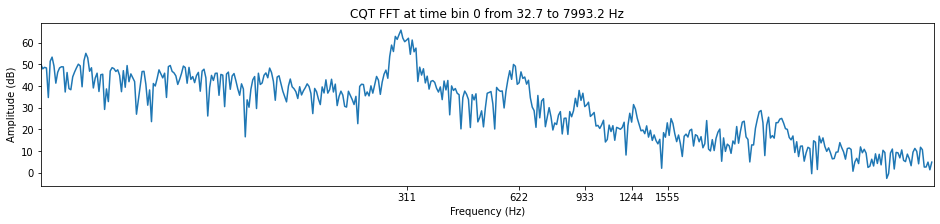

KeyboardInterrupt: Interrupted by user

In [10]:
audiofiles = {}
for instr_id in filtered_instr['vocal_acoustic'][:1]:
    print(instr_id)
    for file_name in train.file_names_nested['vocal_acoustic'][instr_id]:
        print('\n', file_name)
        try:
            af = train.load_file(file_name)
            cqt_spectrogram = af.audio.to_spectrogram(resolution=5, cqt=True)
            cqt_spectrogram.plot_fft(axis_harm=5, figsize=(16, 3))
            af.audio.play(autoplay=True)
            audiofiles[file_name] = af
            input('Press enter to continue ')
        except Exception as exc:
            print(exc)

In [30]:
def load_files(instr_name):
    num_files= 0
    failures = 0
    for instr_id in filtered_instr[instr_name][:1]:
        for file_name in train.file_names_nested[instr_name][instr_id]:
            num_files += 1
            try:
                af = train.load_file(file_name)
                af.audio.to_spectrogram(resolution=5, cqt=True)
            except:
                failures += 1
    print('Failed to load {} / {} files'.format(failures, num_files))

In [31]:
%timeit -n 1
load_files('keyboard_acoustic')

Failed to load 22 / 440 files
